#Pemrograman Tugas Akhir:


"Segmentasi Burned Area menggunakan Model U-Net pada Citra Landsat 9 (Studi Kasus: Sumatera Selatan)"


Alber Analafean - 121450146


*   Deskripsi Data
*   Data Preprocessing
    * Koreksi Atmosferik (Dark Object Substraction)
    * Cloud Masking (QA Bands)
    * Komposit Citra (False Color)
*   Ekstraksi Fitur
    * NDVI
    * NBR
    * dNBR
*   Masking Citra
*   Visualisasi Statistik Citra
*   Download Citra





# Mount Drive & Library

In [1]:
!pip install rasterio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inisilisasi dan authentikasi GEE

In [3]:
import ee
ee.Authenticate() #Authentikasi GEE
ee.Initialize(project='ee-bigdata121450146') #Inisialisasi GEE dengan ID Project GEE

# Deskripsi Data

Prefire: 1 Januari 2023 - 31 Juli 2023

Puncak Kebakaran 2023: Agustus - Oktober 2023

Postfire: 1 Novemebr 2023 - 30 Juni 2024

## Prefire 124062

In [ ]:
import ee
import pandas as pd

#Inisiasi Pathrow dan rentang waktu data digunakan
path = 124
row = 62
start_date = '2023-01-01'
end_date = '2023-07-31'

#Memanggil Koleksi Citra berdasarkan pathrow dan rentang waktu data
landsat9_col = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(ee.Filter.eq('WRS_PATH', path)) \
    .filter(ee.Filter.eq('WRS_ROW', row)) \
    .filterDate(start_date, end_date)

#Memberikan informasi tanggal citra tersedia, persentas cloud cover serta id citra
dates = landsat9_col.aggregate_array('DATE_ACQUIRED').getInfo()
clouds = landsat9_col.aggregate_array('CLOUD_COVER').getInfo()
ids = landsat9_col.aggregate_array('LANDSAT_PRODUCT_ID').getInfo()


#Fungsi membuat dataframe
if dates:
    df = pd.DataFrame({
        'Pathrow': 124062,
        'Kondisi': 'Prefire',
        'Tanggal Citra': dates,
        'Cloud Cover (%)': clouds,
        'Product ID': ids
    })
    df
else:
    print("Tidak ada citra tersedia pada rentang waktu dan path/row tersebut.")

#Menampilkan dataframe sort berdasarkan cloud cover persentase terkecil ke terbesar
df = df.sort_values(by='Cloud Cover (%)', ascending=True).reset_index(drop=True)
df


,Pathrow,Kondisi,Tanggal Citra,Cloud Cover (%),Product ID
0,124062,Prefire,2023-07-26,14.07,LC09_L1TP_124062_20230726_20230726_02_T1
1,124062,Prefire,2023-04-21,29.16,LC09_L1TP_124062_20230421_20230421_02_T1
2,124062,Prefire,2023-06-24,33.04,LC09_L1TP_124062_20230624_20230624_02_T1
3,124062,Prefire,2023-03-20,54.76,LC09_L1TP_124062_20230320_20230320_02_T1
4,124062,Prefire,2023-04-05,56.74,LC09_L1TP_124062_20230405_20230405_02_T1
5,124062,Prefire,2023-05-23,57.75,LC09_L1TP_124062_20230523_20230523_02_T1
6,124062,Prefire,2023-07-10,83.95,LC09_L1TP_124062_20230710_20230710_02_T1
7,124062,Prefire,2023-01-15,84.48,LC09_L1TP_124062_20230115_20230313_02_T1
8,124062,Prefire,2023-02-16,86.69,LC09_L1TP_124062_20230216_20230310_02_T1
9,124062,Prefire,2023-06-08,93.87,LC09_L1TP_124062_20230608_20230608_02_T1


## Prefire 125062

In [ ]:
import ee
import pandas as pd

path = 125
row = 62
start_date = '2023-01-01'
end_date = '2023-07-31'


landsat9_col = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(ee.Filter.eq('WRS_PATH', path)) \
    .filter(ee.Filter.eq('WRS_ROW', row)) \
    .filterDate(start_date, end_date)


dates = landsat9_col.aggregate_array('DATE_ACQUIRED').getInfo()
clouds = landsat9_col.aggregate_array('CLOUD_COVER').getInfo()
ids = landsat9_col.aggregate_array('LANDSAT_PRODUCT_ID').getInfo()


if dates:
    df = pd.DataFrame({
        'Pathrow': 125062,
        'Kondisi': 'Prefire',
        'Tanggal Citra': dates,
        'Cloud Cover (%)': clouds,
        'Product ID': ids
    })
    df
else:
    print("Tidak ada citra tersedia pada rentang waktu dan path/row tersebut.")

df = df.sort_values(by='Cloud Cover (%)', ascending=True).reset_index(drop=True)
df


,Pathrow,Kondisi,Tanggal Citra,Cloud Cover (%),Product ID
0,125062,Prefire,2023-05-14,26.38,LC09_L1TP_125062_20230514_20230514_02_T1
1,125062,Prefire,2023-01-22,50.78,LC09_L1TP_125062_20230122_20230313_02_T1
2,125062,Prefire,2023-06-15,65.17,LC09_L1TP_125062_20230615_20230615_02_T1
3,125062,Prefire,2023-04-12,66.80,LC09_L1TP_125062_20230412_20230412_02_T1
4,125062,Prefire,2023-01-06,73.91,LC09_L1TP_125062_20230106_20230314_02_T1
5,125062,Prefire,2023-04-28,75.61,LC09_L1TP_125062_20230428_20230428_02_T1
6,125062,Prefire,2023-02-07,87.14,LC09_L1TP_125062_20230207_20230310_02_T1
7,125062,Prefire,2023-07-01,90.50,LC09_L1TP_125062_20230701_20230701_02_T1
8,125062,Prefire,2023-05-30,91.37,LC09_L1TP_125062_20230530_20230530_02_T1
9,125062,Prefire,2023-03-27,92.76,LC09_L1TP_125062_20230327_20230327_02_T1


## Postfire 124062

In [ ]:
import ee
import pandas as pd

#Inisiasi Pathrow dan rentang waktu data digunakan
path = 124
row = 62
start_date = '2023-11-01'
end_date = '2024-06-30'

#Memanggil Koleksi Citra berdasarkan pathrow dan rentang waktu data
landsat9_col = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(ee.Filter.eq('WRS_PATH', path)) \
    .filter(ee.Filter.eq('WRS_ROW', row)) \
    .filterDate(start_date, end_date)

#Memberikan informasi tanggal citra tersedia, persentas cloud cover serta id citra
dates = landsat9_col.aggregate_array('DATE_ACQUIRED').getInfo()
clouds = landsat9_col.aggregate_array('CLOUD_COVER').getInfo()
ids = landsat9_col.aggregate_array('LANDSAT_PRODUCT_ID').getInfo()


#Fungsi membuat dataframe
if dates:
    df = pd.DataFrame({
        'Pathrow': 125062,
        'Kondisi': 'Postfire',
        'Tanggal Citra': dates,
        'Cloud Cover (%)': clouds,
        'Product ID': ids
    })
    df
else:
    print("Tidak ada citra tersedia pada rentang waktu dan path/row tersebut.")

#Menampilkan dataframe sort berdasarkan cloud cover persentase terkecil ke terbesar
df = df.sort_values(by='Cloud Cover (%)', ascending=True).reset_index(drop=True)
df


,Pathrow,Kondisi,Tanggal Citra,Cloud Cover (%),Product ID
0,125062,Postfire,2024-05-09,7.42,LC09_L1TP_124062_20240509_20240509_02_T1
1,125062,Postfire,2024-06-10,17.72,LC09_L1TP_124062_20240610_20240610_02_T1
2,125062,Postfire,2023-11-15,23.63,LC09_L1TP_124062_20231115_20231115_02_T1
3,125062,Postfire,2024-06-26,38.13,LC09_L1TP_124062_20240626_20240626_02_T1
4,125062,Postfire,2024-03-22,44.23,LC09_L1TP_124062_20240322_20240322_02_T1
5,125062,Postfire,2024-05-25,50.42,LC09_L1TP_124062_20240525_20240525_02_T1
6,125062,Postfire,2024-02-19,51.83,LC09_L1TP_124062_20240219_20240219_02_T1
7,125062,Postfire,2024-04-23,52.63,LC09_L1TP_124062_20240423_20240423_02_T1
8,125062,Postfire,2023-12-17,69.01,LC09_L1TP_124062_20231217_20231217_02_T1
9,125062,Postfire,2024-03-06,96.90,LC09_L1TP_124062_20240306_20240306_02_T1


## Postfire 125062

In [ ]:
import ee
import pandas as pd

#Inisiasi Pathrow dan rentang waktu data digunakan
path = 125
row = 62
start_date = '2023-11-01'
end_date = '2024-06-30'

#Memanggil Koleksi Citra berdasarkan pathrow dan rentang waktu data
landsat9_col = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(ee.Filter.eq('WRS_PATH', path)) \
    .filter(ee.Filter.eq('WRS_ROW', row)) \
    .filterDate(start_date, end_date)

#Memberikan informasi tanggal citra tersedia, persentas cloud cover serta id citra
dates = landsat9_col.aggregate_array('DATE_ACQUIRED').getInfo()
clouds = landsat9_col.aggregate_array('CLOUD_COVER').getInfo()
ids = landsat9_col.aggregate_array('LANDSAT_PRODUCT_ID').getInfo()


#Fungsi membuat dataframe
if dates:
    df = pd.DataFrame({
        'Pathrow': 125062,
        'Kondisi': 'Postfire',
        'Tanggal Citra': dates,
        'Cloud Cover (%)': clouds,
        'Product ID': ids
    })
    df
else:
    print("Tidak ada citra tersedia pada rentang waktu dan path/row tersebut.")

#Menampilkan dataframe sort berdasarkan cloud cover persentase terkecil ke terbesar
df = df.sort_values(by='Cloud Cover (%)', ascending=True).reset_index(drop=True)
df


,Pathrow,Kondisi,Tanggal Citra,Cloud Cover (%),Product ID
0,125062,Postfire,2024-06-17,37.03,LC09_L1TP_125062_20240617_20240617_02_T1
1,125062,Postfire,2023-11-06,41.67,LC09_L1TP_125062_20231106_20231106_02_T1
2,125062,Postfire,2024-04-30,43.43,LC09_L1TP_125062_20240430_20240430_02_T1
3,125062,Postfire,2024-03-29,46.65,LC09_L1TP_125062_20240329_20240329_02_T1
4,125062,Postfire,2024-05-16,48.69,LC09_L1TP_125062_20240516_20240516_02_T1
5,125062,Postfire,2024-04-14,58.24,LC09_L1TP_125062_20240414_20240414_02_T1
6,125062,Postfire,2023-12-08,69.28,LC09_L1TP_125062_20231208_20231208_02_T1
7,125062,Postfire,2024-01-09,77.90,LC09_L1TP_125062_20240109_20240109_02_T1
8,125062,Postfire,2024-02-26,80.47,LC09_L1TP_125062_20240226_20240226_02_T1
9,125062,Postfire,2024-01-25,81.34,LC09_L1TP_125062_20240125_20240125_02_T1


# Data Preprocessing

## Koreksi Atmosferik (DOS)

### DOS 124 pre

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

#Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)  #Mengambil URL peta dari objek citra EE dengan visualisasi tertentu

     #Menambahkan layer citra EE ke peta Folium menggunakan TileLayer
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format, # URL tile GEE
        attr='Google Earth Engine', #Atribut sumber tile
        name=name, #Nama layer untuk kontrol layer di peta
        overlay=True, #Menandakan ini layer tambahan, bukan base map
        control=True  #Memungkinkan kontrol layer aktif/nonaktif
    ).add_to(self) #Menambahkan layer ke map
folium.Map.add_ee_layer = add_ee_layer


#Filter Path/Row dan Tanggal
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'

#Ambil citra dari koleksi berdasarkan cloud cover terkecil
landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()

#Ambil metadata tanggal dan cloud cover
date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f'Citra yang ditampilkan diambil pada tanggal: {date_acquired}')
print(f'Persentase Cloud Cover: {cloud_cover}%')

#DARK OBJECT SUBTRACTION (DOS)
def dark_object_subtraction(img, band_names): #memanggil band names di dark_object_substractiobn (B7,B5,B4)
    def subtract_min(band_name):
        band = img.select(band_name) #Memilih band tertentu
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),  #mendekati nilai minimum (nilai persentil 1)
            geometry=band.geometry(), #geometri dari band
            scale=30, #skala resolusi 30meter
            maxPixels=1e9 #batas max pixel dihitung
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name) # Mengurangi seluruh nilai band dengan nilai dark object, hasilnya direturn sebagai band baru
    corrected_bands = [subtract_min(b) for b in band_names]  #hasilnya berupa list band yang sudah dikoreksi
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames()) # Menggabungkan semua band hasil koreksi menjadi satu citra baru, dan menyalin properti metadata dari citra asli

#menjalankan fungsi dark_object_subtraction, dengan inputan citra landsat9_toa dan list band
dos_corrected = dark_object_subtraction(landsat9_toa, ['B7', 'B5', 'B4'])


#Visualisasi citra di GEEMAP
false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'DOS False Color (B7-B5-B4)')
m.add_child(folium.LayerControl()) # Kontrol layer


#informasi tanggal dan cloud cover di atas peta
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Koreksi Atmosferik (DOS) | Pathrow 124062 | Prefire
     </b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))
m


Citra yang ditampilkan diambil pada tanggal: 2023-07-26
Persentase Cloud Cover: 14.07%


### Dos 125 pre

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'


landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()


date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f'Citra yang ditampilkan diambil pada tanggal: {date_acquired}')
print(f'Persentase Cloud Cover: {cloud_cover}%')


def dark_object_subtraction(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),  # mendekati nilai minimum
            geometry=band.geometry(),
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)

    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())


dos_corrected = dark_object_subtraction(landsat9_toa, ['B7', 'B5', 'B4'])


false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}


m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'DOS False Color (B7-B5-B4)')
m.add_child(folium.LayerControl())


title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Koreksi Atmosferik (DOS) | Pathrow 125062 | Prefire
     </b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))
m


Citra yang ditampilkan diambil pada tanggal: 2023-05-14
Persentase Cloud Cover: 26.38%


### Dos 124 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-05-30'


landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()


date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f'Citra yang ditampilkan diambil pada tanggal: {date_acquired}')
print(f'Persentase Cloud Cover: {cloud_cover}%')


def dark_object_subtraction(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),  # mendekati nilai minimum
            geometry=band.geometry(),
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)

    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())


dos_corrected = dark_object_subtraction(landsat9_toa, ['B7', 'B5', 'B4'])


false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}


m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'DOS False Color (B7-B5-B4)')
m.add_child(folium.LayerControl())


title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Koreksi Atmosferik (DOS) | Pathrow 124062 | Postfire
     </b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))
m


Citra yang ditampilkan diambil pada tanggal: 2024-05-09
Persentase Cloud Cover: 7.42%


### Dos 125 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-05-30'


landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()


date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f'Citra yang ditampilkan diambil pada tanggal: {date_acquired}')
print(f'Persentase Cloud Cover: {cloud_cover}%')


def dark_object_subtraction(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),  # mendekati nilai minimum
            geometry=band.geometry(),
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)

    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())


dos_corrected = dark_object_subtraction(landsat9_toa, ['B7', 'B5', 'B4'])


false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}


m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'DOS False Color (B7-B5-B4)')
m.add_child(folium.LayerControl())


title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Koreksi Atmosferik (DOS) | Pathrow 125062 | Postfire
     </b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))
m


Citra yang ditampilkan diambil pada tanggal: 2023-11-06
Persentase Cloud Cover: 41.67%


## Cloud Masking (QA Band)

### QA Band 124 Pre

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

#Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


#Pathrow dan rentang waktu data
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'

#Ambil koleksi citra LANDSAT 9 TOA berdasarkan Pathrow dan rentang waktu
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

#Pilih citra dengan cloud cover terendah
image_best = collection.first() #Mengambil citra pertama dari Collection berdasarkan pathrow, rentang waktu dan cloudcover
roi_geometry = image_best.geometry() #ROI geometri berdasarkan image_best, membantu DOS hanya spesifik di ROI

#DARK OBJECT SUBTRACTION (DOS)
def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

#Terapkan DOS pada setiap citra
def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

#Koleksi hasil koreksi atmosferik (DOS)
dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


# Fungsi Cloud Masking menggunakan QA_PIXEL dari citra asli
def cloudmask(dos_img): #FUngsi cloudmask memanggil dos_img dari fungsi apply_dos
    system_index = dos_img.get('system:index')  # Mengambil ID sistem citra input (yang sudah dikoreksi DOS)
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first() # Mengambil citra asli dari koleksi berdasarkan system:index yang sama
    qa = original.select('QA_PIXEL') # Menyeleksi band QA_PIXEL dari citra asli

    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)  # Bit 6: Clear

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

#Terapkan masking awan ke citra hasil DOS
masked_dos_collection = dos_collection.map(cloudmask)

#Composite setelah masking (akan ada lubang karena masking)
composite_after = masked_dos_collection.median()

#Tambal lubang dengan composite sebelum masking
dos_corrected = composite_after.unmask(composite_before)


#visualisasi
false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Cloud Masking (QA Bands)')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Cloud Masking | Pathrow 124062 | Prefire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


### QA Band 125 Pre

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)

false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Cloud Masking (QA Bands)')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Cloud Masking | Pathrow 125062 | Prefire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


### QA Band 124 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)

false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Cloud Masking (QA Bands)')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Cloud Masking | Pathrow 124062 | Postfire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


### QA Band 125 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)

false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Cloud Masking (QA Bands)')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Cloud Masking | Pathrow 125062 | Postfire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


## Komposit Citra (False Color)

### False color 124 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)

false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Komposit')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Komposit False Color | Pathrow 124062 | Postfire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


### False Color 125 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)

false_color_vis = {
    'bands': ['B7', 'B5', 'B4'],
    'min': 0.0,
    'max': 0.5,
}
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dos_corrected, false_color_vis, 'Komposit')
m.add_child(folium.LayerControl())

title_html = f'''
    <h3 align="center" style="font-size:20px"><b>
     Komposit False Color | Pathrow 125062 | Postfire
     </b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))
m


# Ekstraksi Fitur

## NDVI 124 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

#Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi DOS
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

#Fungsi Masking awan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')

    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


# Ambil koleksi dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NDVI dari citra mentah
ndvi_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI')).median()
# Masking awan
masked_collection = collection.map(mask_fmask)
# Hitung NDVI dari citra yang sudah di-mask
ndvi_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI'))
ndvi_composite = ndvi_masked.median()

# Ambil geometri dari image pertama
first_image = collection.first()
geometry = first_image.geometry()

#Unmask bagian berlubang dan clip ke ROI
ndvi_filled = ndvi_composite.unmask(ndvi_fill).clip(geometry)


# Visualisasi NDVI
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'orange', 'yellow', 'green', 'darkgreen']
}


# Tampilkan ke peta dengan FOLIUM
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(ndvi_filled, ndvi_vis_params, 'NDVI Pathrow 124062')

# Tambahkan Layer Control
m.add_child(folium.LayerControl())

# ========================================
# Tambahkan Legenda NDVI
legend_keys = [
    '< 0: Non Vegetasi',
    '0 - 0.2: Vegetasi Sangat Jarang',
    '0.2 - 0.4: Vegetasi Rendah',
    '0.4 - 0.6: Vegetasi Sedang-Lebat',
    '> 0.6: Vegetasi Sangat Lebat'
]

legend_colors = [
    (255, 0, 0),         # red
    (255, 165, 0),       # orange
    (255, 255, 0),       # yellow
    (0, 128, 0),         # green
    (0, 100, 0)          # darkgreen
]

legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>NDVI pathrow 124062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan Peta
m


## NDVI 125 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

#Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi DOS
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

#Fungsi Masking awan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')

    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


# Ambil koleksi dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NDVI dari citra mentah
ndvi_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI')).median()
# Masking awan
masked_collection = collection.map(mask_fmask)
# Hitung NDVI dari citra yang sudah di-mask
ndvi_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI'))
ndvi_composite = ndvi_masked.median()

# Ambil geometri dari image pertama
first_image = collection.first()
geometry = first_image.geometry()

#Unmask bagian berlubang dan clip ke ROI
ndvi_filled = ndvi_composite.unmask(ndvi_fill).clip(geometry)


# Visualisasi NDVI
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'orange', 'yellow', 'green', 'darkgreen']
}


# Tampilkan ke peta dengan FOLIUM
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(ndvi_filled, ndvi_vis_params, 'NDVI Pathrow 124062')

# Tambahkan Layer Control
m.add_child(folium.LayerControl())

# ========================================
# Tambahkan Legenda NDVI
legend_keys = [
    '< 0: Non Vegetasi',
    '0 - 0.2: Vegetasi Sangat Jarang',
    '0.2 - 0.4: Vegetasi Rendah',
    '0.4 - 0.6: Vegetasi Sedang-Lebat',
    '> 0.6: Vegetasi Sangat Lebat'
]

legend_colors = [
    (255, 0, 0),         # red
    (255, 165, 0),       # orange
    (255, 255, 0),       # yellow
    (0, 128, 0),         # green
    (0, 100, 0)          # darkgreen
]

legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>NDVI pathrow 125062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Tampilkan Peta
m


## NBR 124 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


# Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi koreksi atmosfer Dark Object Subtraction (DOS1)
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

# Fungsi masking awan berdasarkan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))

    return image.updateMask(mask)

# Ambil koleksi citra dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NBR dari citra mentah untuk penambal lubang
nbr_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()

#Masking awan
masked_collection = collection.map(mask_fmask)

#Hitung NBR dari citra yang sudah di-mask
nbr_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
nbr_composite = nbr_masked.median()

# Ambil geometri dari citra pertama
first_image = collection.first()
geometry = first_image.geometry()

# Unmask bagian berlubang dan clip ke ROI
nbr_filled = nbr_composite.unmask(nbr_fill).clip(geometry)


# Parameter visualisasi NBR
nbr_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'orange', 'yellow', 'green', 'darkgreen']
}

m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(nbr_filled, nbr_vis_params, 'NBR Pathrow 124062')
m.add_child(folium.LayerControl())

# Tambahkan Legenda NBR
legend_keys = [
    '< 0: Non Vegetasi',
    '0 - 0.2: Vegetasi Sangat Jarang',
    '0.2 - 0.4: Vegetasi Rendah',
    '0.4 - 0.6: Vegetasi Sedang-Lebat',
    '> 0.6: Vegetasi Sangat Lebat'
]

legend_colors = [
    (255, 0, 0),         # red
    (255, 165, 0),       # orange
    (255, 255, 0),       # yellow
    (0, 128, 0),         # green
    (0, 100, 0)          # darkgreen
]


legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>NBR Pathrow 124062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

m


## NBR 125 Post

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


# Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi koreksi atmosfer Dark Object Subtraction (DOS1)
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

# Fungsi masking awan berdasarkan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))

    return image.updateMask(mask)

# Ambil koleksi citra dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NBR dari citra mentah untuk penambal lubang
nbr_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()

#Masking awan
masked_collection = collection.map(mask_fmask)

#Hitung NBR dari citra yang sudah di-mask
nbr_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
nbr_composite = nbr_masked.median()

# Ambil geometri dari citra pertama
first_image = collection.first()
geometry = first_image.geometry()

# Unmask bagian berlubang dan clip ke ROI
nbr_filled = nbr_composite.unmask(nbr_fill).clip(geometry)


# Parameter visualisasi NBR
nbr_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'orange', 'yellow', 'green', 'darkgreen']}

m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(nbr_filled, nbr_vis_params, 'NBR Pathrow 124062')
m.add_child(folium.LayerControl())

# Tambahkan Legenda NBR
# Tambahkan Legenda NBR
legend_keys = [
    '< 0: Non Vegetasi',
    '0 - 0.2: Vegetasi Sangat Jarang',
    '0.2 - 0.4: Vegetasi Rendah',
    '0.4 - 0.6: Vegetasi Sedang-Lebat',
    '> 0.6: Vegetasi Sangat Lebat'
]

legend_colors = [
    (255, 0, 0),         # red
    (255, 165, 0),       # orange
    (255, 255, 0),       # yellow
    (0, 128, 0),         # green
    (0, 100, 0)          # darkgreen
]

legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>NBR Pathrow 125062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

m


## DNBR 124

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)


prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'



def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)



def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)



prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

dnbr_vis_params = {
    'min': -0.2,
    'max': 1,
    'palette': ['darkgreen', 'yellow', 'orange', 'red', 'black']
}

# =========================
# Peta
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dnbr, dnbr_vis_params, 'dNBR')
m.add_child(folium.LayerControl())

# =========================
# Legenda dNBR (4 kelas)
legend_keys = [
    '< 0.1: Tidak Terbakar',
    '0.1 - 0.27: Keparahan Rendah',
    '0.1 - 0.27: Keparahan Rendah-Sedang',
    '0.27 - 0.66: Keparahan Sedang-Tinggi',
    '> 0.66: Keparahan Tinggi'
]

legend_colors = [
    (0, 128, 0),       # darkgreen
    (255, 255, 0),     # yellow
    (255, 165, 0),     # orange
    (255, 0, 0),       # red
        (0, 0, 0), # balck
]

legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>dNBR Pathrow 124062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# =========================
# Tampilkan
m


## DNBR 125

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)


prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'



def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)



def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)



prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

dnbr_vis_params = {
    'min': -0.2,
    'max': 1,
    'palette': ['darkgreen', 'yellow', 'orange', 'red', 'black']
}

# =========================
# Peta
m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dnbr, dnbr_vis_params, 'dNBR')
m.add_child(folium.LayerControl())

# =========================
# Legenda dNBR (4 kelas)
legend_keys = [
    '< 0.1: Tidak Terbakar',
    '0.1 - 0.27: Keparahan Rendah',
    '0.1 - 0.27: Keparahan Rendah-Sedang',
    '0.27 - 0.66: Keparahan Sedang-Tinggi',
    '> 0.66: Keparahan Tinggi'
]

legend_colors = [
    (0, 128, 0),       # darkgreen
    (255, 255, 0),     # yellow
    (255, 165, 0),     # orange
    (255, 0, 0),       # red
        (0, 0, 0), # balck
]


legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>dNBR Pathrow 125062</b><br>
'''

for label, color in zip(legend_keys, legend_colors):
    rgb = f'rgb{color}'
    legend_html += f'<i style="background:{rgb};width:12px;height:12px;display:inline-block;margin-right:6px;"></i>{label}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# =========================
# Tampilkan
m


# Masking Citra

## Mask 124

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)

# Prefire dan postfire
prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'

def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)


def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)

#Hitung dNBR
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

#Thresholding: dNBR > 0.1
dnbr_mask = dnbr.gt(0.1).rename('BurnedMask').uint8()


# Visualisasi
mask_vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['000000', 'ffffff']
}

m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dnbr_mask, mask_vis_params, 'Burned Area Mask (dNBR > 0.1)')
m.add_child(folium.LayerControl())
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>Citra Mask 124062</b><br>
<i style="background:rgb(255,255,255);width:12px;height:12px;display:inline-block;margin-right:6px;"></i>Terbakar<br>
<i style="background:rgb(0,0,0);width:12px;height:12px;display:inline-block;margin-right:6px;"></i>Tidak Terbakar<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))
m



## Mask 125

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)

# Prefire dan postfire
prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'

def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)


def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)

#Hitung dNBR
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

#Thresholding: dNBR > 0.1
dnbr_mask = dnbr.gt(0.1).rename('BurnedMask').uint8()


# Visualisasi
mask_vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['000000', 'ffffff']
}

m = folium.Map(location=[-3.3194, 104.7458], zoom_start=8)
m.add_ee_layer(dnbr_mask, mask_vis_params, 'Burned Area Mask (dNBR > 0.1)')
m.add_child(folium.LayerControl())
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 10px;
    z-index: 9999;
    background-color: white;
    padding: 10px;
    border: 2px solid grey;
    border-radius: 5px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    font-size:14px;
">
<b>Citra Mask 124062</b><br>
<i style="background:rgb(255,255,255);width:12px;height:12px;display:inline-block;margin-right:6px;"></i>Terbakar<br>
<i style="background:rgb(0,0,0);width:12px;height:12px;display:inline-block;margin-right:6px;"></i>Tidak Terbakar<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))
m


# Unduh Citra dan Save in GDrive

## Citra False Color

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)


# Ekspor citra False Color ke Google Drive
export_region = roi_geometry.bounds()  # Gunakan batas geometri citra terbaik

task = ee.batch.Export.image.toDrive(
    image=dos_corrected,
    description='FalseColor_124062',
    folder='GEE_Export',
    fileNamePrefix='FalseColor_124062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # Sistem proyeksi WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor False Color telah dimulai. Cek tab Tasks di Earth Engine.")


Proses ekspor False Color telah dimulai. Cek tab Tasks di Earth Engine.


In [ ]:
import ee
import folium
import geemap.foliumap as geemap

def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER')

image_best = collection.first()
roi_geometry = image_best.geometry()

def dos(img, band_names):
    def subtract_min(band_name):
        band = img.select(band_name)
        dark_object = band.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=roi_geometry,
            scale=30,
            maxPixels=1e9
        ).get(band_name)
        return band.subtract(ee.Number(dark_object)).rename(band_name)
    corrected_bands = [subtract_min(b) for b in band_names]
    return ee.Image.cat(corrected_bands).copyProperties(img, img.propertyNames())

def apply_dos(img):
    dos_img = dos(img, ['B7', 'B5', 'B4'])
    return dos_img.copyProperties(img, img.propertyNames())

dos_collection = collection.map(apply_dos)
composite_before = dos_collection.median()


def cloudmask(dos_img):
    system_index = dos_img.get('system:index')
    original = collection.filter(ee.Filter.eq('system:index', system_index)).first()
    qa = original.select('QA_PIXEL')
    #Bit untuk masking kualitas citra dari QA_PIXEL
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return dos_img.updateMask(mask)

masked_dos_collection = dos_collection.map(cloudmask)
composite_after = masked_dos_collection.median()
dos_corrected = composite_after.unmask(composite_before)


# Ekspor citra False Color ke Google Drive
export_region = roi_geometry.bounds()  # Gunakan batas geometri citra terbaik

task = ee.batch.Export.image.toDrive(
    image=dos_corrected,
    description='FalseColor_125062',
    folder='GEE_Export',
    fileNamePrefix='FalseColor_125062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # Sistem proyeksi WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor False Color telah dimulai. Cek tab Tasks di Earth Engine.")


Proses ekspor False Color telah dimulai. Cek tab Tasks di Earth Engine.


## Citra NDVI

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

#Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi DOS
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

#Fungsi Masking awan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')

    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


# Ambil koleksi dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NDVI dari citra mentah
ndvi_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI')).median()
# Masking awan
masked_collection = collection.map(mask_fmask)
# Hitung NDVI dari citra yang sudah di-mask
ndvi_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI'))
ndvi_composite = ndvi_masked.median()

# Ambil geometri dari image pertama
first_image = collection.first()
geometry = first_image.geometry()

#Unmask bagian berlubang dan clip ke ROI
ndvi_filled = ndvi_composite.unmask(ndvi_fill).clip(geometry)




# Ekspor NDVI ke Google Drive
export_region = geometry.bounds()  # Batas wilayah ekspor dari citra pertama

task = ee.batch.Export.image.toDrive(
    image=ndvi_filled,
    description='NDVI_124062',
    folder='GEE_Export',
    fileNamePrefix='NDVI_124062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor NDVI telah dimulai. Cek tab 'Tasks' di Earth Engine.")


Proses ekspor NDVI telah dimulai. Cek tab 'Tasks' di Earth Engine.


In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer

#Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi DOS
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

#Fungsi Masking awan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')

    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


# Ambil koleksi dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NDVI dari citra mentah
ndvi_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI')).median()
# Masking awan
masked_collection = collection.map(mask_fmask)
# Hitung NDVI dari citra yang sudah di-mask
ndvi_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B4']).rename('NDVI'))
ndvi_composite = ndvi_masked.median()

# Ambil geometri dari image pertama
first_image = collection.first()
geometry = first_image.geometry()

#Unmask bagian berlubang dan clip ke ROI
ndvi_filled = ndvi_composite.unmask(ndvi_fill).clip(geometry)


# Ekspor NDVI ke Google Drive
export_region = geometry.bounds()  # Batas wilayah ekspor dari citra pertama

task = ee.batch.Export.image.toDrive(
    image=ndvi_filled,
    description='NDVI_125062',
    folder='GEE_Export',
    fileNamePrefix='NDVI_125062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor NDVI telah dimulai. Cek tab 'Tasks' di Earth Engine.")


Proses ekspor NDVI telah dimulai. Cek tab 'Tasks' di Earth Engine.


## Citra NBR

In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


# Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi koreksi atmosfer Dark Object Subtraction (DOS1)
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

# Fungsi masking awan berdasarkan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))

    return image.updateMask(mask)

# Ambil koleksi citra dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NBR dari citra mentah untuk penambal lubang
nbr_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()

#Masking awan
masked_collection = collection.map(mask_fmask)

#Hitung NBR dari citra yang sudah di-mask
nbr_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
nbr_composite = nbr_masked.median()

# Ambil geometri dari citra pertama
first_image = collection.first()
geometry = first_image.geometry()

# Unmask bagian berlubang dan clip ke ROI
nbr_filled = nbr_composite.unmask(nbr_fill).clip(geometry)



# Ekspor citra NBR yang sudah diisi ke Google Drive
export_region = geometry.bounds()  # Gunakan batas geometri citra

task = ee.batch.Export.image.toDrive(
    image=nbr_filled,
    description='NBR_124062',
    folder='GEE_Export',
    fileNamePrefix='NBR_124062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # Sistem koordinat WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor telah dimulai. Periksa Google Earth Engine Tasks tab.")


Proses ekspor telah dimulai. Periksa Google Earth Engine Tasks tab.


In [ ]:
import ee
import folium
import geemap.foliumap as geemap

# Fungsi agar folium bisa menampilkan EE layer
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


# Filter lokasi dan waktu
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'


# Fungsi koreksi atmosfer Dark Object Subtraction (DOS1)
def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)

# Fungsi masking awan berdasarkan QA_PIXEL
def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))

    return image.updateMask(mask)

# Ambil koleksi citra dan terapkan DOS
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)

#Hitung NBR dari citra mentah untuk penambal lubang
nbr_fill = collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()

#Masking awan
masked_collection = collection.map(mask_fmask)

#Hitung NBR dari citra yang sudah di-mask
nbr_masked = masked_collection.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
nbr_composite = nbr_masked.median()

# Ambil geometri dari citra pertama
first_image = collection.first()
geometry = first_image.geometry()

# Unmask bagian berlubang dan clip ke ROI
nbr_filled = nbr_composite.unmask(nbr_fill).clip(geometry)



# Ekspor citra NBR yang sudah diisi ke Google Drive
export_region = geometry.bounds()  # Gunakan batas geometri citra

task = ee.batch.Export.image.toDrive(
    image=nbr_filled,
    description='NBR_125062',
    folder='GEE_Export',
    fileNamePrefix='NBR_125062',
    region=export_region.getInfo()['coordinates'],
    scale=30,
    crs='EPSG:4326',  # Sistem koordinat WGS 84
    maxPixels=1e13
)

task.start()

print("Proses ekspor telah dimulai. Periksa Google Earth Engine Tasks tab.")


Proses ekspor telah dimulai. Periksa Google Earth Engine Tasks tab.


## Citra Mask

In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)

# Prefire dan postfire
prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'

def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)


def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)

#Hitung dNBR
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

#Thresholding: dNBR > 0.1
dnbr_mask = dnbr.gt(0.1).rename('BurnedMask').uint8()

# Ekspor ke Google Drive
export_task = ee.batch.Export.image.toDrive(
    image=dnbr_mask,
    description='MASK_124062',
    folder='GEE_Export',  # Nama folder di Google Drive
    fileNamePrefix='MASK_124062',
    region=geometry.bounds().getInfo()['coordinates'],  # Area ekspor mengikuti citra
    scale=30,
    crs='EPSG:4326',
    maxPixels=1e13
)

# Jalankan task ekspor
export_task.start()


In [ ]:
import ee
import folium
import geemap.foliumap as geemap


def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)
folium.Map.add_ee_layer = add_ee_layer


path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)

# Prefire dan postfire
prefire_start = '2023-01-01'
prefire_end   = '2023-07-31'
postfire_start = '2023-11-01'
postfire_end   = '2024-06-30'

def apply_dos1(image):
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
    corrected = []
    for band in bands:
        band_data = image.select(band)
        dark_object = band_data.reduceRegion(
            reducer=ee.Reducer.percentile([1]),
            geometry=image.geometry(),
            scale=30,
            maxPixels=1e9
        ).getNumber(band)
        corrected_band = band_data.subtract(dark_object).max(0).rename(band)
        corrected.append(corrected_band)
    return image.addBands(ee.Image.cat(corrected), overwrite=True)


def mask_fmask(image):
    qa = image.select('QA_PIXEL')
    fill    = (1 << 0)  # Bit 0: piksel kosong (invalid)
    dilated = (1 << 1)  # Bit 1: buffer awan
    cirrus  = (1 << 2)  # Bit 2: awan tipis
    cloud   = (1 << 3)  # Bit 3: awan
    shadow  = (1 << 4)  # Bit 4: bayangan awan
    clear   = (1 << 6)

    mask = qa.bitwiseAnd(fill).eq(0) \
        .And(qa.bitwiseAnd(dilated).eq(0)) \
        .And(qa.bitwiseAnd(cirrus).eq(0)) \
        .And(qa.bitwiseAnd(cloud).eq(0)) \
        .And(qa.bitwiseAnd(shadow).eq(0)) \
        .And(qa.bitwiseAnd(clear).neq(0))
    return image.updateMask(mask)


prefire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(prefire_start, prefire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
prefire_fill = prefire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
prefire_masked = prefire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
prefire_nbr = prefire_masked.median().unmask(prefire_fill)


postfire = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(postfire_start, postfire_end) \
    .sort('CLOUD_COVER') \
    .map(apply_dos1)
postfire_fill = postfire.map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR')).median()
postfire_masked = postfire.map(mask_fmask).map(lambda img: img.normalizedDifference(['B5', 'B7']).rename('NBR'))
postfire_nbr = postfire_masked.median().unmask(postfire_fill)

#Hitung dNBR
dnbr = prefire_nbr.subtract(postfire_nbr).rename('dNBR')

#Thresholding: dNBR > 0.1
dnbr_mask = dnbr.gt(0.1).rename('BurnedMask').uint8()

# Ekspor ke Google Drive
export_task = ee.batch.Export.image.toDrive(
    image=dnbr_mask,
    description='MASK_125062',
    folder='GEE_Export',  # Nama folder di Google Drive
    fileNamePrefix='MASK_125062',
    region=geometry.bounds().getInfo()['coordinates'],  # Area ekspor mengikuti citra
    scale=30,
    crs='EPSG:4326',
    maxPixels=1e13
)

# Jalankan task ekspor
export_task.start()


# Visualisasi Statistik

## Diagram garis

Citra: 2023-07-26, Cloud: 14.07%


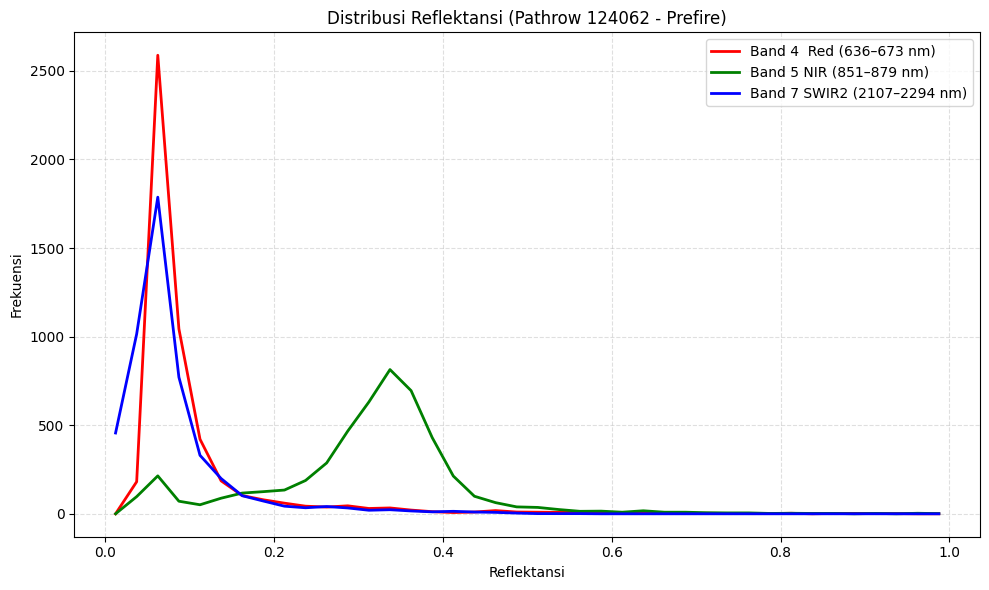

In [33]:
import ee
import numpy as np
import matplotlib.pyplot as plt

# --- Filter Path/Row dan Tanggal ---
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'

# --- Ambil citra Landsat 9 TOA dengan cloud cover terendah ---
landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()

# --- Metadata ---
date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f"Citra: {date_acquired}, Cloud: {cloud_cover}%")

# --- Hanya pakai band 4,5,7 ---
band_names = ['B4', 'B5', 'B7']
band_labels = {
    'B4': 'Band 4  Red (636–673 nm)',
    'B5': 'Band 5 NIR (851–879 nm)',
    'B7': 'Band 7 SWIR2 (2107–2294 nm)'
}

# --- Sampling piksel dari GEE
sample = landsat9_toa.select(band_names).sample(
    region=landsat9_toa.geometry(),
    scale=30,
    numPixels=5000,
    geometries=False
).getInfo()

# --- Ekstrak nilai reflektansi per band ---
features = sample['features']
band_values = {b: [] for b in band_names}

for f in features:
    props = f['properties']
    for b in band_names:
        val = props.get(b)
        if val is not None:
            band_values[b].append(val)

# --- Plot histogram frekuensi ---
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
bins = np.linspace(0, 1, 41)  # 40 bin dari 0 ke 1

for i, b in enumerate(band_names):
    arr = np.array(band_values[b])
    counts, bin_edges = np.histogram(arr, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label=band_labels[b], color=colors[i], linewidth=2)

plt.xlabel('Reflektansi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Reflektansi (Pathrow 124062 - Prefire)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Citra: 2023-05-14, Cloud: 26.38%


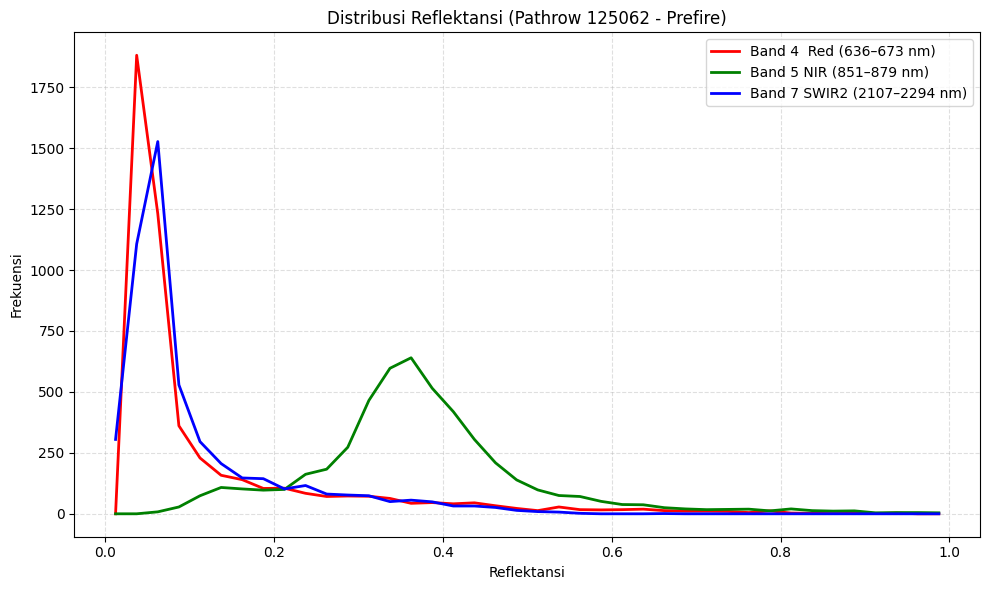

In [34]:
import ee
import numpy as np
import matplotlib.pyplot as plt

# --- Filter Path/Row dan Tanggal ---
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-01-01'
end_date = '2023-07-31'

# --- Ambil citra Landsat 9 TOA dengan cloud cover terendah ---
landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()

# --- Metadata ---
date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f"Citra: {date_acquired}, Cloud: {cloud_cover}%")

# --- Hanya pakai band 4,5,7 ---
band_names = ['B4', 'B5', 'B7']
band_labels = {
    'B4': 'Band 4  Red (636–673 nm)',
    'B5': 'Band 5 NIR (851–879 nm)',
    'B7': 'Band 7 SWIR2 (2107–2294 nm)'
}

# --- Sampling piksel dari GEE
sample = landsat9_toa.select(band_names).sample(
    region=landsat9_toa.geometry(),
    scale=30,
    numPixels=5000,
    geometries=False
).getInfo()

# --- Ekstrak nilai reflektansi per band ---
features = sample['features']
band_values = {b: [] for b in band_names}

for f in features:
    props = f['properties']
    for b in band_names:
        val = props.get(b)
        if val is not None:
            band_values[b].append(val)

# --- Plot histogram frekuensi ---
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
bins = np.linspace(0, 1, 41)  # 40 bin dari 0 ke 1

for i, b in enumerate(band_names):
    arr = np.array(band_values[b])
    counts, bin_edges = np.histogram(arr, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label=band_labels[b], color=colors[i], linewidth=2)

plt.xlabel('Reflektansi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Reflektansi (Pathrow 125062 - Prefire)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Citra: 2024-05-09, Cloud: 7.42%


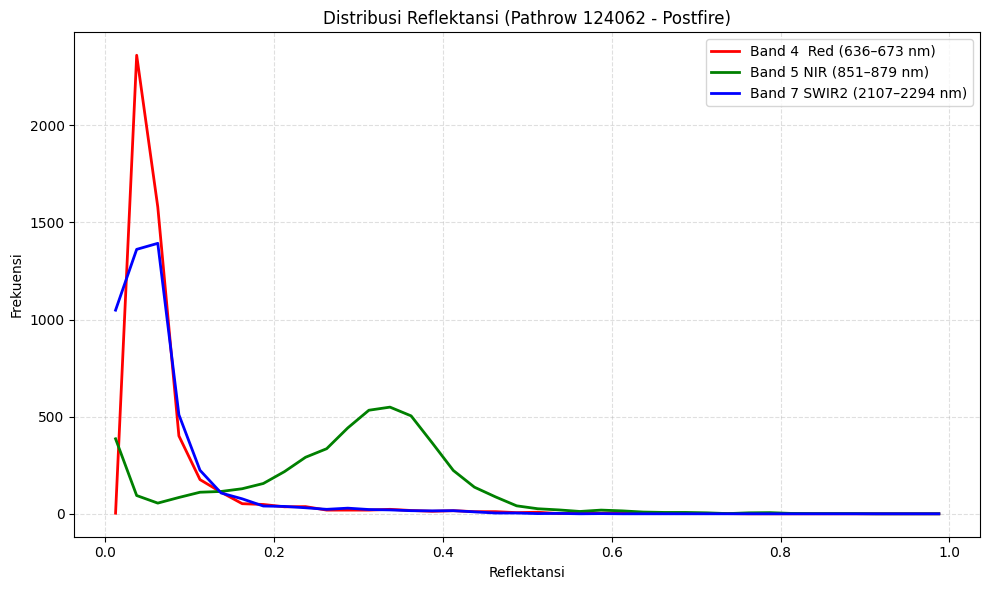

In [36]:
import ee
import numpy as np
import matplotlib.pyplot as plt

# --- Filter Path/Row dan Tanggal ---
path_filter = ee.Filter.eq('WRS_PATH', 124)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'

# --- Ambil citra Landsat 9 TOA dengan cloud cover terendah ---
landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()

# --- Metadata ---
date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f"Citra: {date_acquired}, Cloud: {cloud_cover}%")

# --- Hanya pakai band 4,5,7 ---
band_names = ['B4', 'B5', 'B7']
band_labels = {
    'B4': 'Band 4  Red (636–673 nm)',
    'B5': 'Band 5 NIR (851–879 nm)',
    'B7': 'Band 7 SWIR2 (2107–2294 nm)'
}

# --- Sampling piksel dari GEE
sample = landsat9_toa.select(band_names).sample(
    region=landsat9_toa.geometry(),
    scale=30,
    numPixels=5000,
    geometries=False
).getInfo()

# --- Ekstrak nilai reflektansi per band ---
features = sample['features']
band_values = {b: [] for b in band_names}

for f in features:
    props = f['properties']
    for b in band_names:
        val = props.get(b)
        if val is not None:
            band_values[b].append(val)

# --- Plot histogram frekuensi ---
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
bins = np.linspace(0, 1, 41)  # 40 bin dari 0 ke 1

for i, b in enumerate(band_names):
    arr = np.array(band_values[b])
    counts, bin_edges = np.histogram(arr, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label=band_labels[b], color=colors[i], linewidth=2)

plt.xlabel('Reflektansi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Reflektansi (Pathrow 124062 - Postfire)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Citra: 2024-06-17, Cloud: 37.03%


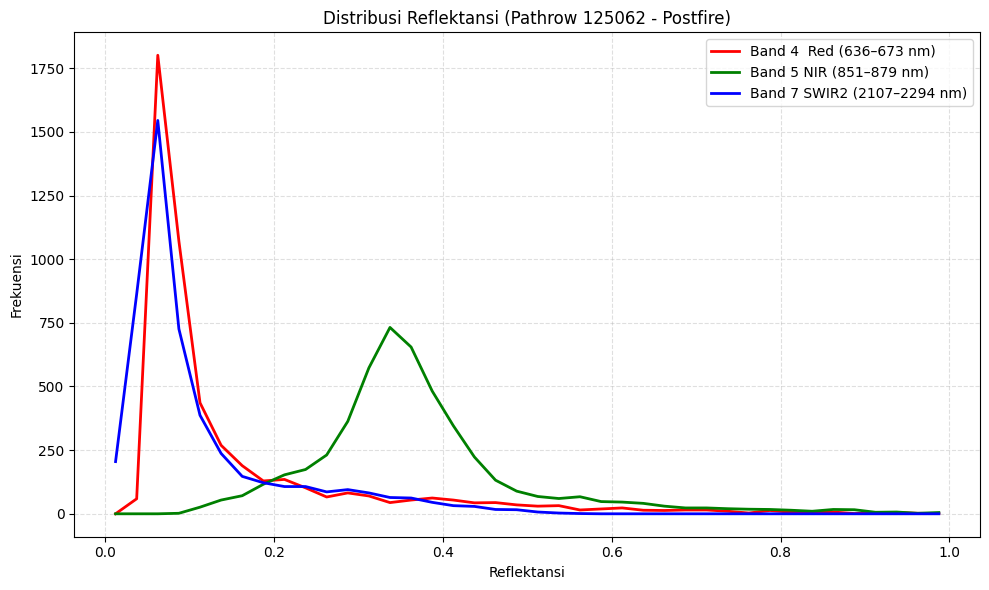

In [37]:
import ee
import numpy as np
import matplotlib.pyplot as plt

# --- Filter Path/Row dan Tanggal ---
path_filter = ee.Filter.eq('WRS_PATH', 125)
row_filter = ee.Filter.eq('WRS_ROW', 62)
pathrow_filter = ee.Filter.And(path_filter, row_filter)
start_date = '2023-11-01'
end_date = '2024-06-30'

# --- Ambil citra Landsat 9 TOA dengan cloud cover terendah ---
landsat9_toa = ee.ImageCollection('LANDSAT/LC09/C02/T1_TOA') \
    .filter(pathrow_filter) \
    .filterDate(start_date, end_date) \
    .sort('CLOUD_COVER') \
    .first()

# --- Metadata ---
date_acquired = landsat9_toa.get('DATE_ACQUIRED').getInfo()
cloud_cover = landsat9_toa.get('CLOUD_COVER').getInfo()
print(f"Citra: {date_acquired}, Cloud: {cloud_cover}%")

# --- Hanya pakai band 4,5,7 ---
band_names = ['B4', 'B5', 'B7']
band_labels = {
    'B4': 'Band 4  Red (636–673 nm)',
    'B5': 'Band 5 NIR (851–879 nm)',
    'B7': 'Band 7 SWIR2 (2107–2294 nm)'
}

# --- Sampling piksel dari GEE
sample = landsat9_toa.select(band_names).sample(
    region=landsat9_toa.geometry(),
    scale=30,
    numPixels=5000,
    geometries=False
).getInfo()

# --- Ekstrak nilai reflektansi per band ---
features = sample['features']
band_values = {b: [] for b in band_names}

for f in features:
    props = f['properties']
    for b in band_names:
        val = props.get(b)
        if val is not None:
            band_values[b].append(val)

# --- Plot histogram frekuensi ---
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
bins = np.linspace(0, 1, 41)  # 40 bin dari 0 ke 1

for i, b in enumerate(band_names):
    arr = np.array(band_values[b])
    counts, bin_edges = np.histogram(arr, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label=band_labels[b], color=colors[i], linewidth=2)

plt.xlabel('Reflektansi')
plt.ylabel('Frekuensi')
plt.title('Distribusi Reflektansi (Pathrow 125062 - Postfire)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## Histogram NDVI

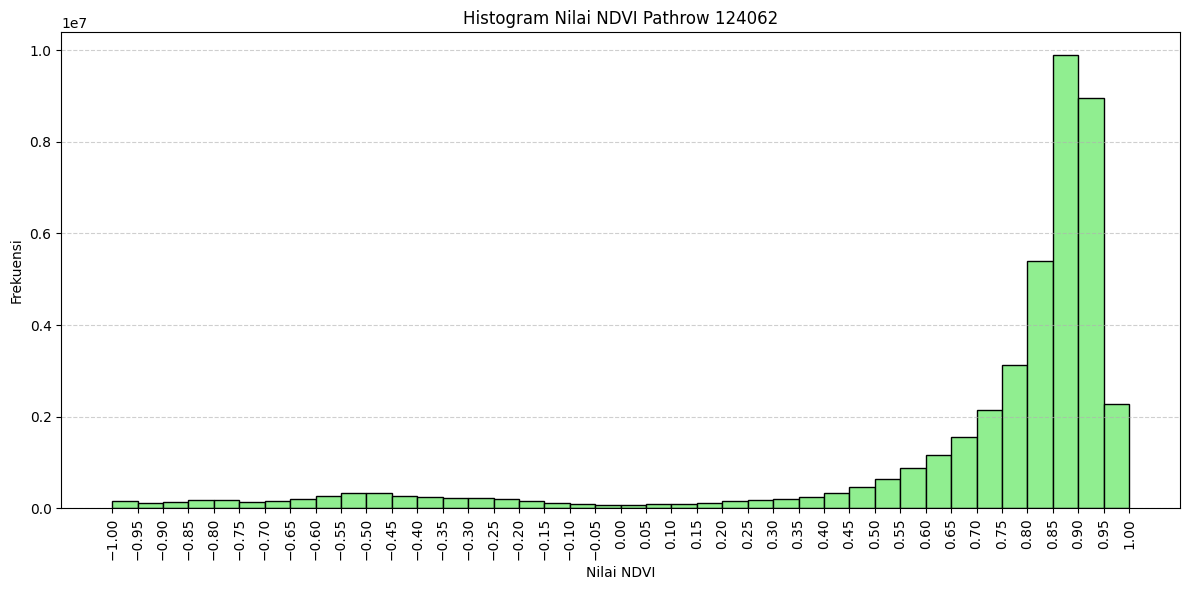

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path ke file NDVI
path = '/content/drive/MyDrive/GEE_Export/NDVI_124062.tif'  # Ganti sesuai path file kamu

# Baca data NDVI
with rasterio.open(path) as src:
    ndvi = src.read(1).astype('float32').flatten()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(ndvi, bins=40, range=(-1, 1), color='lightgreen', edgecolor='black')

# Set xticks lengkap dan vertikal
xticks = np.round(np.arange(-1, 1.05, 0.05), 2)
plt.xticks(xticks, rotation='vertical')

plt.xlabel('Nilai NDVI')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai NDVI Pathrow 124062')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


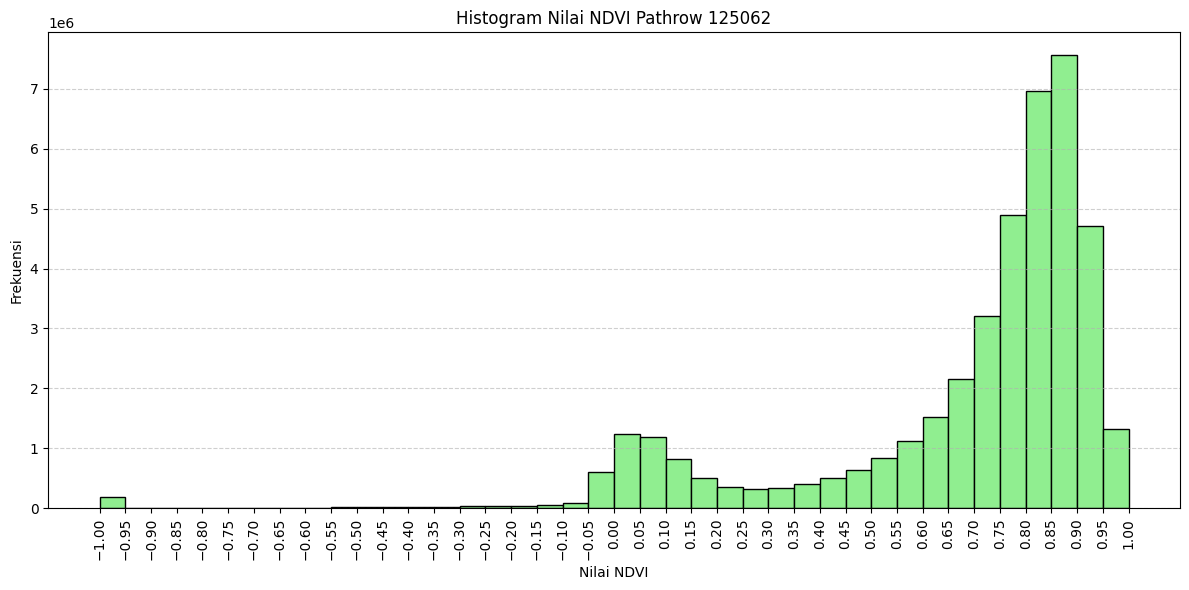

In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path ke file NDVI
path = '/content/drive/MyDrive/GEE_Export/NDVI_125062.tif'  # Ganti sesuai path file kamu

# Baca data NDVI
with rasterio.open(path) as src:
    ndvi = src.read(1).astype('float32').flatten()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(ndvi, bins=40, range=(-1, 1), color='lightgreen', edgecolor='black')

# Set xticks lengkap dan vertikal
xticks = np.round(np.arange(-1, 1.05, 0.05), 2)
plt.xticks(xticks, rotation='vertical')

plt.xlabel('Nilai NDVI')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai NDVI Pathrow 125062')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Histogram NBR

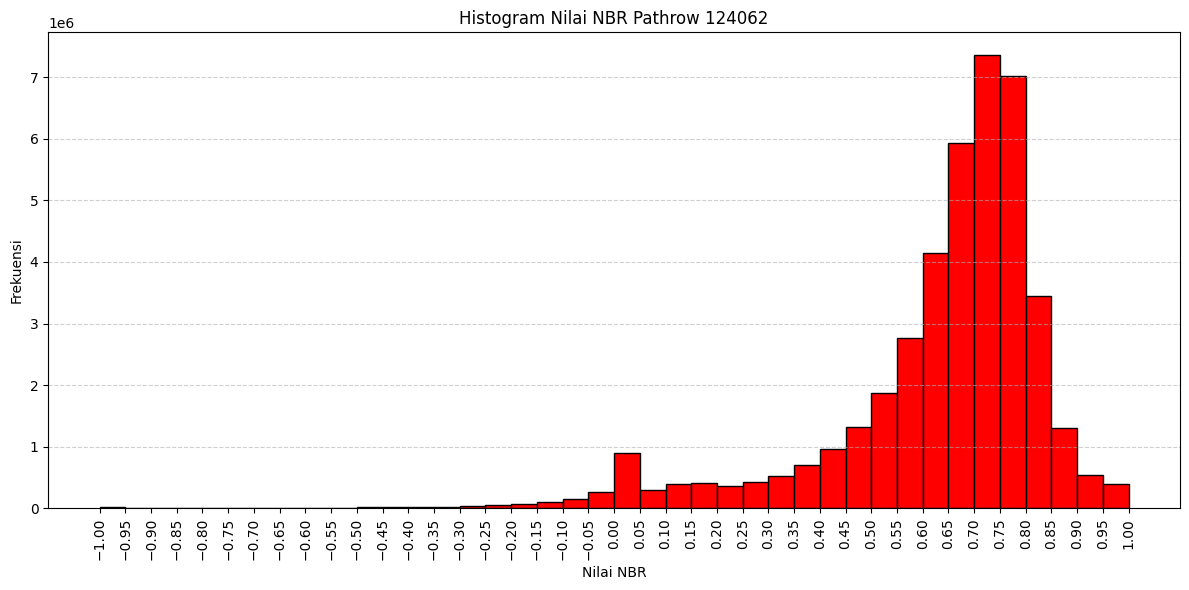

In [31]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path ke file NDVI
path = '/content/drive/MyDrive/GEE_Export/NBR_124062.tif'  # Ganti sesuai path file kamu

# Baca data NDVI
with rasterio.open(path) as src:
    nbr = src.read(1).astype('float32').flatten()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(nbr, bins=40, range=(-1, 1), color='red', edgecolor='black')

# Set xticks lengkap dan vertikal
xticks = np.round(np.arange(-1, 1.05, 0.05), 2)
plt.xticks(xticks, rotation='vertical')

plt.xlabel('Nilai NBR')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai NBR Pathrow 124062')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


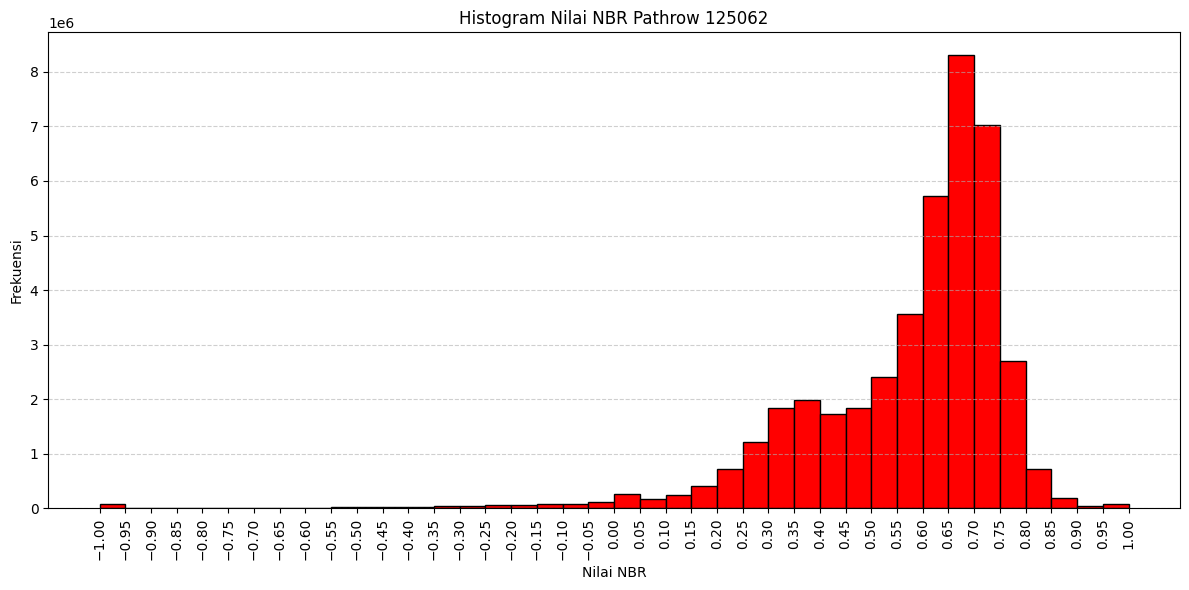

In [32]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path ke file NDVI
path = '/content/drive/MyDrive/GEE_Export/NBR_125062.tif'  # Ganti sesuai path file kamu

# Baca data NDVI
with rasterio.open(path) as src:
    nbr = src.read(1).astype('float32').flatten()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(nbr, bins=40, range=(-1, 1), color='red', edgecolor='black')

# Set xticks lengkap dan vertikal
xticks = np.round(np.arange(-1, 1.05, 0.05), 2)
plt.xticks(xticks, rotation='vertical')

plt.xlabel('Nilai NBR')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai NBR Pathrow 125062')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Barplot Masking Citra (Piksel x Frekuensi)

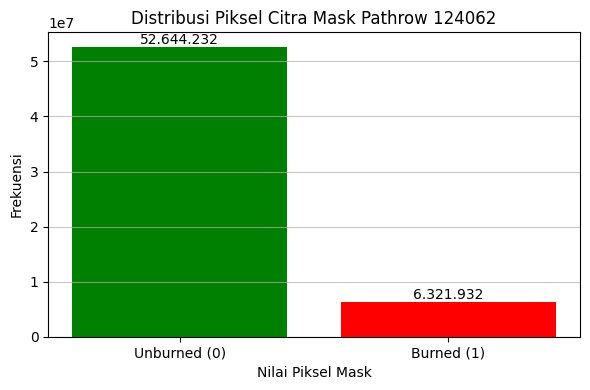

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Baca citra mask dari GeoTIFF
path = '/content/drive/MyDrive/GEE_Export/MASK_124062.tif'

with rasterio.open(path) as src:
    mask = src.read(1)


# Hitung frekuensi piksel
unique, counts = np.unique(mask, return_counts=True)
freq_dict = dict(zip(unique, counts))

# Buat barplot
labels = ['Unburned (0)', 'Burned (1)']
values = [freq_dict.get(0, 0), freq_dict.get(1, 0)]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['green', 'red'])

# Tambahkan jumlah dengan format titik ribuan
for bar in bars:
    height = bar.get_height()
    jumlah_format = f'{int(height):,}'.replace(',', '.')
    plt.text(bar.get_x() + bar.get_width()/2, height,
             jumlah_format,
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Nilai Piksel Mask')
plt.ylabel('Frekuensi')
plt.title('Distribusi Piksel Citra Mask Pathrow 124062')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


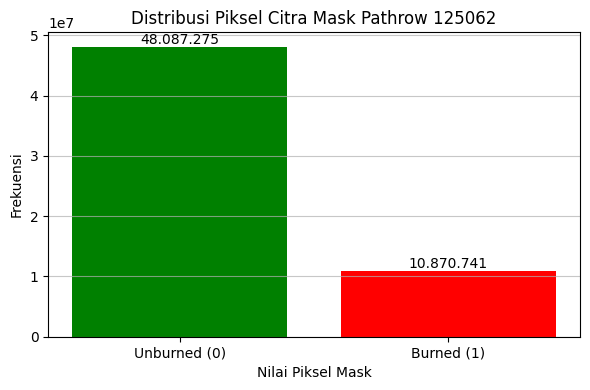

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Baca citra mask dari GeoTIFF
path = '/content/drive/MyDrive/GEE_Export/MASK_125062.tif'

with rasterio.open(path) as src:
    mask = src.read(1)


# Hitung frekuensi piksel
unique, counts = np.unique(mask, return_counts=True)
freq_dict = dict(zip(unique, counts))

# Buat barplot
labels = ['Unburned (0)', 'Burned (1)']
values = [freq_dict.get(0, 0), freq_dict.get(1, 0)]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['green', 'red'])

# Tambahkan jumlah dengan format titik ribuan
for bar in bars:
    height = bar.get_height()
    jumlah_format = f'{int(height):,}'.replace(',', '.')
    plt.text(bar.get_x() + bar.get_width()/2, height,
             jumlah_format,
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Nilai Piksel Mask')
plt.ylabel('Frekuensi')
plt.title('Distribusi Piksel Citra Mask Pathrow 125062')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()
